In [35]:
import matplotlib.pyplot as pyp
import numpy as np
import datetime
import pandas as pd

In [41]:
file = '/home/radio/data/specAnalyzer/run1_2018-07-30_17-22-04.hdf5'
head = pd.read_hdf(file, key='header')
spectra = pd.read_hdf(file, key='spectra')
timestamps = head.keys()
print(timestamps.values)

['2018-07-30-01-17-31-01' '2018-07-30-01-17-31-14'
 '2018-07-30-01-17-31-26' '2018-07-30-01-17-31-39'
 '2018-07-30-01-17-31-52' '2018-07-30-01-17-32-06'
 '2018-07-30-01-17-32-20' '2018-07-30-01-17-32-36'
 '2018-07-30-01-17-32-49' '2018-07-30-01-17-33-02'
 '2018-07-30-01-17-33-14']


In [37]:
datestrf = '%Y-%m-%d-%W-%H-%M-%S'
print( datetime.datetime.strptime(timestamps[0], datestrf))
datetimestamps = [datetime.datetime.strptime(ts, datestrf) for ts in timestamps]

2018-07-30 17:31:01


In [48]:
starttime = datetimestamps[0]
tdelta = np.zeros(len(datetimestamps))
for i,ts in enumerate(datetimestamps):
    tdelta[i] = (ts - starttime).total_seconds()

spectrogram = np.zeros( (len(datetimestamps), len(spectra[timestamps[0]].power_dBm)))
print(np.shape(spectrogram))
for i, dt in enumerate(tdelta):
    timestamp = timestamps[i]
    spec = spectra[timestamp].power_dBm
    spectrogram[i,:] = spec
    
freq = spectra[timestamp].freq_hz    
freqmesh, timemesh = np.meshgrid(freq/1e6, tdelta)

(11, 551)


Text(0.5,1,'2018-07-30-31-17-31-01')

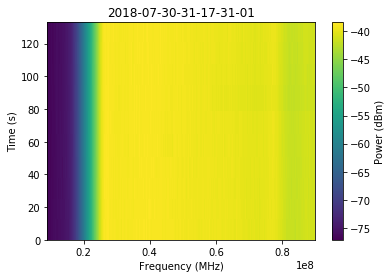

In [53]:
pyp.pcolormesh(freqmesh,timemesh, spectrogram)
cbar = pyp.colorbar()
cbar.set_label("Power (dBm)")
pyp.xlabel("Frequency (MHz)")
pyp.ylabel("Time (s)")
pyp.title(starttime.strftime(format=datestrf))

Text(0.5,1,'2018-07-30-31-17-31-01')

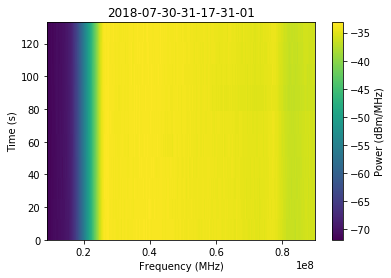

In [59]:
pyp.pcolormesh(freqmesh,timemesh, spectrogram-10*np.log10(300e-3))
cbar = pyp.colorbar()
cbar.set_label("Power (dBm/MHz)")
pyp.xlabel("Frequency (MHz)")
pyp.ylabel("Time (s)")
pyp.title(starttime.strftime(format=datestrf))